In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from scipy import stats

In [3]:
df = pd.read_csv("data.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
df = df.drop(labels = ["name","id","release_date"],axis = 1)

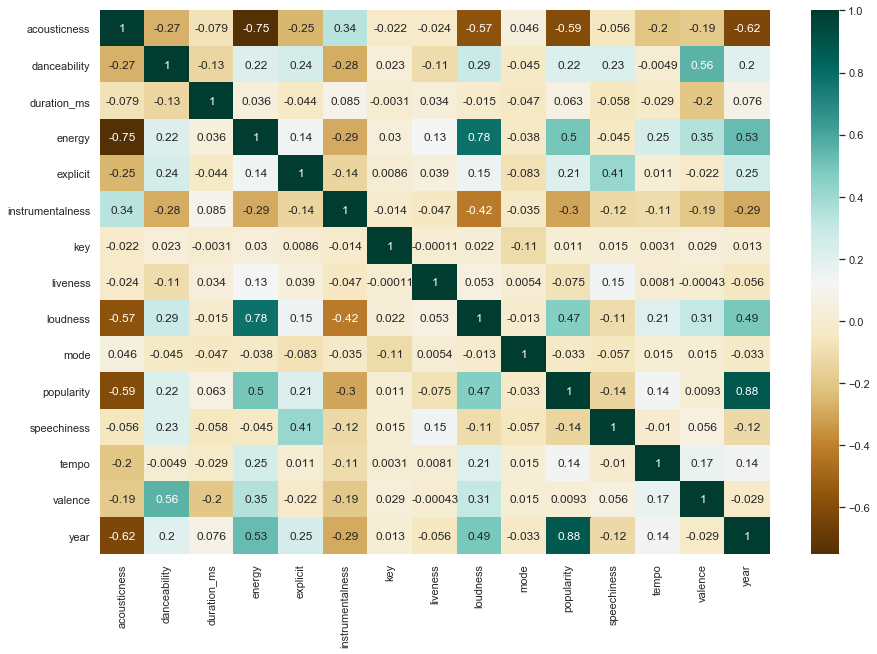

In [5]:
df['artists'] = df['artists'].apply(lambda x: x[1:-1].replace("'", ''))
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

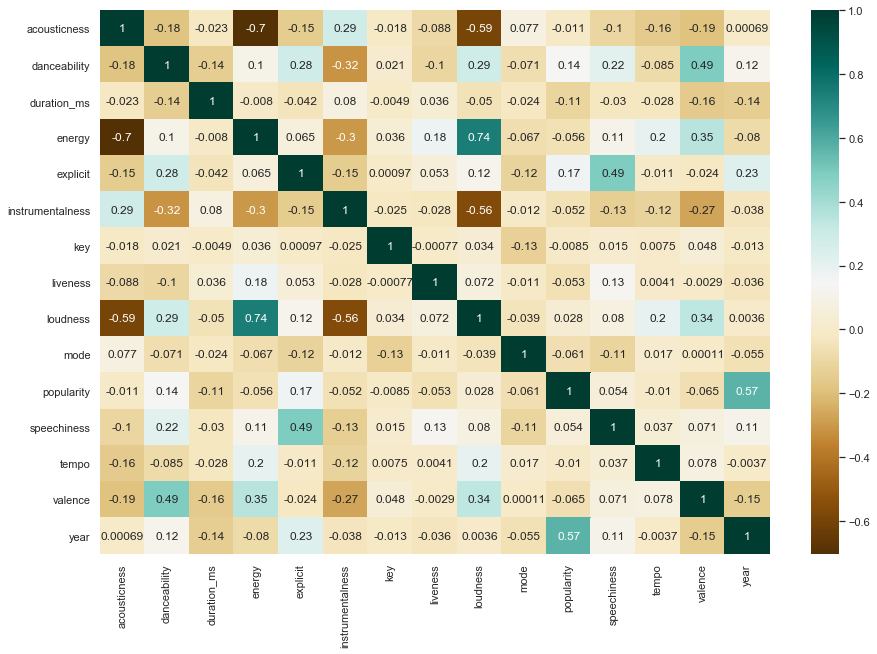

In [6]:
century21 = df[df['year'] >= 2000]
plt.figure(figsize=(15,10))
c= century21.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [7]:
[century21[century21['explicit'] == 1].count()/century21.count()][0][0]

0.22589782984444018

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,41656.000000,41656.000000,4.165600e+04,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000,41656.000000
mean,0.256952,0.591214,2.311291e+05,0.644285,0.225898,0.072736,5.243734,0.191869,-7.366857,0.666843,54.837142,0.096391,121.079982,0.496931,2009.928678
std,0.291735,0.173443,9.031206e+04,0.225457,0.418177,0.220462,3.575972,0.158935,4.524076,0.471348,10.880196,0.104605,30.885522,0.249855,6.025886
min,0.000000,0.000000,3.030100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,0.020400,0.482000,1.918400e+05,0.505000,0.000000,0.000000,2.000000,0.096000,-8.486000,0.000000,47.000000,0.035600,96.035000,0.300000,2005.000000
50%,0.129000,0.602000,2.222930e+05,0.675000,0.000000,0.000003,5.000000,0.126000,-6.290000,1.000000,54.000000,0.050900,119.980000,0.492000,2010.000000
75%,0.423000,0.719000,2.574270e+05,0.823000,0.000000,0.000933,8.000000,0.243000,-4.752000,1.000000,62.000000,0.107000,141.870750,0.694000,2015.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,1.342000,1.000000,100.000000,0.955000,220.099000,1.000000,2020.000000


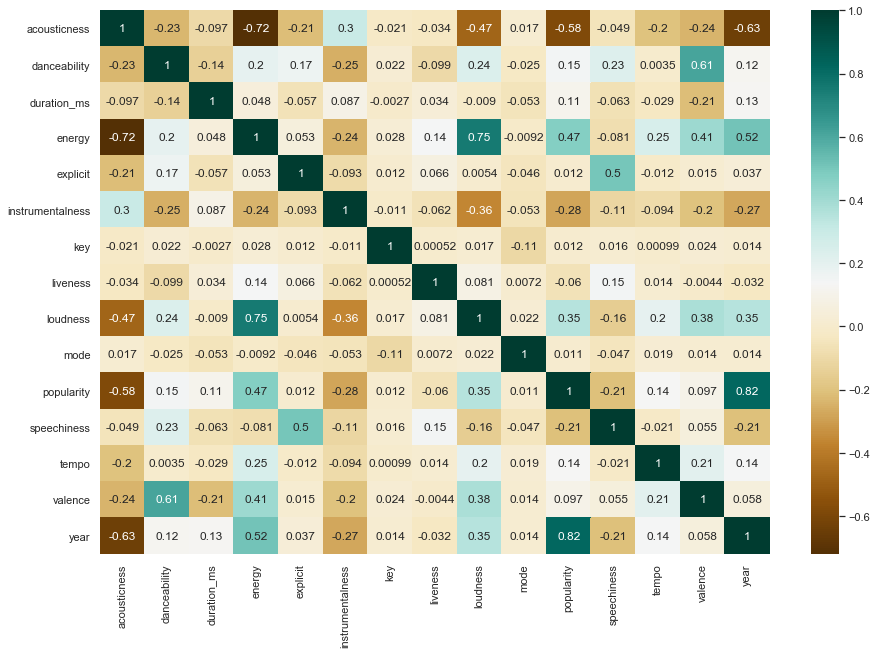

In [8]:
century20 = df[df['year'] < 2000]
plt.figure(figsize=(15,10))
c= century20.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [9]:
[century20[century20['explicit'] == 1].count()/century20.count()][0][0]

0.03905561663274933

In [10]:
"""
We can see the difference between explicit songs which clearly defines the difference in listening over the different centuries.
We may further see this for different features and also an increase in explicit songs in the 21st century.
This can be observed in the individual generations of change also.
Also, the popularity increases over the 20th century and goes a bit more less correlated in the 21st century.
This happens due to the gaining popularity of streaming services and the music inclined generation we have built today.
Now, let's see how the popularity is gained for individual artists over the time period.
"""

"\nWe can see the difference between explicit songs which clearly defines the difference in listening over the different centuries.\nWe may further see this for different features and also an increase in explicit songs in the 21st century.\nThis can be observed in the individual generations of change also.\nAlso, the popularity increases over the 20th century and goes a bit more less correlated in the 21st century.\nThis happens due to the gaining popularity of streaming services and the music inclined generation we have built today.\nNow, let's see how the popularity is gained for individual artists over the time period.\n"

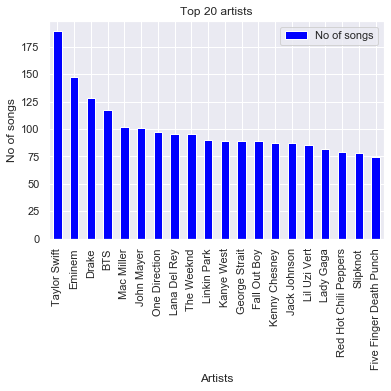

In [11]:
top20artists = pd.DataFrame({'No of songs':century21['artists'].value_counts().head(20)})
top20artists.plot.bar(color='blue')
plt.title('Top 20 artists')
plt.xlabel('Artists')
plt.ylabel('No of songs')
plt.show()

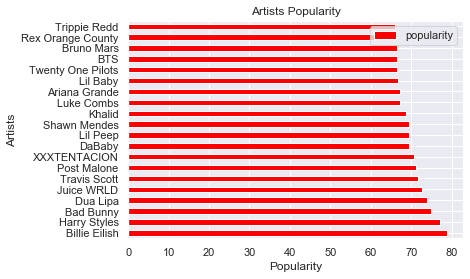

In [12]:
minartists = century21.groupby(['artists']).filter(lambda x: len(x) > 20)
artists_grp = minartists.groupby(['artists'])
Top20artists = artists_grp[['popularity']].mean().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='red')
plt.title('Artists Popularity')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
training_data_total = df.sample(10000)
y = training_data_total['popularity']
X = training_data_total.drop(['popularity','artists'],axis = 1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

from sklearn.model_selection import train_test_split
testing_data = century21.sample(1000)
y = testing_data['popularity']
X = testing_data.drop(['popularity','artists'],axis = 1)
# split into train test sets
X1_train, X_test, y1_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

test_results = dt.predict(X_test)

sse = ((test_results - y_test)^2).mean()

import math
math.sqrt(abs(sse))

(8000, 14) (2000, 14) (8000,) (2000,)
(8000, 14) (200, 14) (8000,) (200,)


1.140175425099138

In [63]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

test_results = dt.predict(X_test)

sse = ((test_results - y_test)^2).mean()

math.sqrt(abs(sse))

0.9591663046625439

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)

test_results = lr.predict(X_test)

sse = ((test_results - y_test)^2).mean()
math.sqrt(abs(sse))

7.490994593510264

In [65]:
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(X_train,y_train)

test_results = clf.predict(X_test)

sse = ((test_results - y_test)^2).mean()
math.sqrt(abs(sse))

7.490994593510264